<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/Data_pengangguran_jabar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: Import Library dan Persiapan Data

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat dataframe
data = {
    'Kelompok_Umur': ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+'],
    'Pengangguran_2021': [426022, 695382, 407090, 226356, 168443, 134218, 134769, 72382, 60411, 105074],
    'Pengangguran_2022': [567774, 688725, 290763, 143463, 86860, 77169, 72700, 68049, 54094, 76009],
    'Pengangguran_2023': [512888, 656304, 258100, 121728, 76669, 58463, 59589, 68623, 45642, 30281]
}

df = pd.DataFrame(data)
print("Data awal:")
print(df)

Data awal:
  Kelompok_Umur  Pengangguran_2021  Pengangguran_2022  Pengangguran_2023
0         15-19             426022             567774             512888
1         20-24             695382             688725             656304
2         25-29             407090             290763             258100
3         30-34             226356             143463             121728
4         35-39             168443              86860              76669
5         40-44             134218              77169              58463
6         45-49             134769              72700              59589
7         50-54              72382              68049              68623
8         55-59              60411              54094              45642
9           60+             105074              76009              30281


Section 2: Preprocessing Data

In [2]:
# Mengambil data numerik untuk clustering
X = df[['Pengangguran_2021', 'Pengangguran_2022', 'Pengangguran_2023']].values

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData yang telah di-standardisasi:")
print(X_scaled)


Data yang telah di-standardisasi:
[[ 0.94387831  1.61772901  1.54627077]
 [ 2.33312924  2.16856955  2.23058987]
 [ 0.84623464  0.35615292  0.33053267]
 [-0.0859189  -0.31468743 -0.32017551]
 [-0.38461094 -0.57247138 -0.53517756]
 [-0.56112978 -0.61660658 -0.62204872]
 [-0.55828794 -0.6369595  -0.61667593]
 [-0.88005508 -0.6581413  -0.57356959]
 [-0.9417967  -0.72169579 -0.68322498]
 [-0.71144285 -0.6218895  -0.75652103]]


Section 3: Menentukan Jumlah Cluster Optimal (Elbow Method)

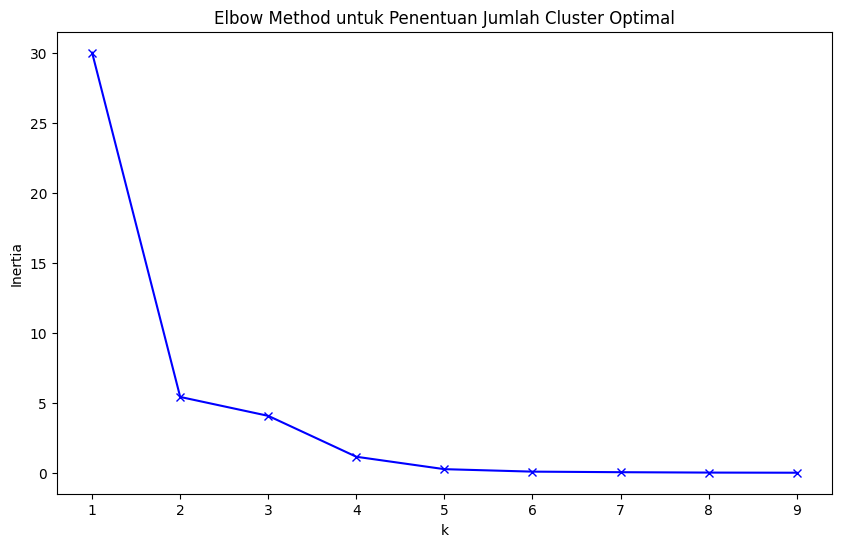

In [3]:
# Menghitung inertia untuk berbagai nilai k
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Penentuan Jumlah Cluster Optimal')
plt.show()

Section 4: Implementasi K-Means Clustering


Hasil Clustering:
  Kelompok_Umur  Pengangguran_2021  Pengangguran_2022  Pengangguran_2023  \
0         15-19             426022             567774             512888   
1         20-24             695382             688725             656304   
2         25-29             407090             290763             258100   
3         30-34             226356             143463             121728   
4         35-39             168443              86860              76669   
5         40-44             134218              77169              58463   
6         45-49             134769              72700              59589   
7         50-54              72382              68049              68623   
8         55-59              60411              54094              45642   
9           60+             105074              76009              30281   

   Cluster  
0        2  
1        1  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0  


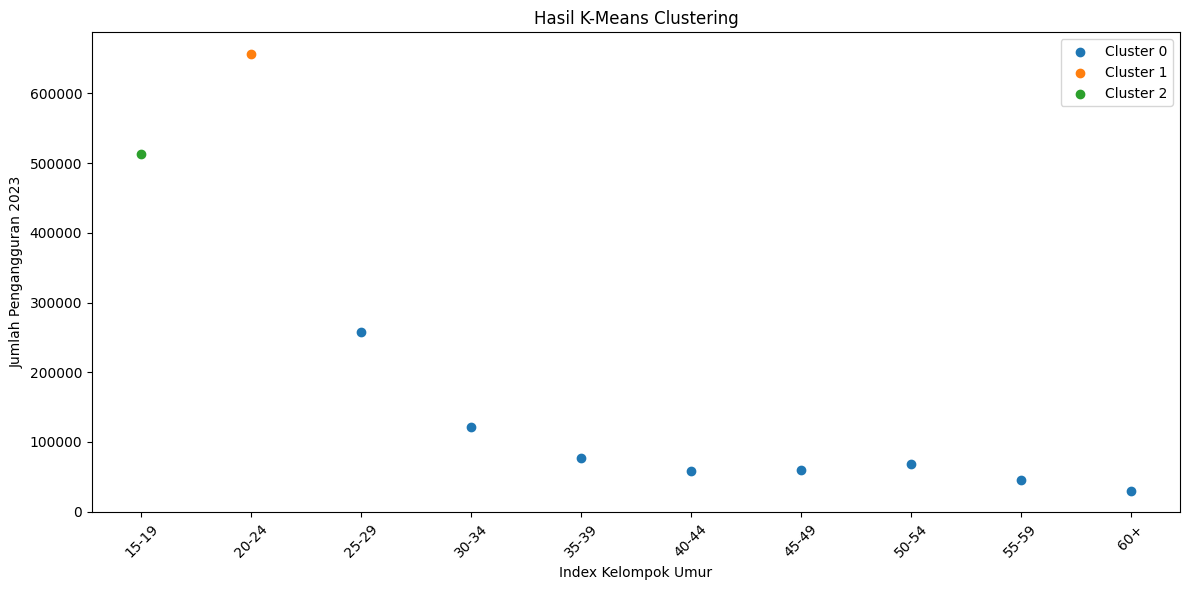

In [4]:
# Melakukan clustering dengan jumlah cluster optimal (misalnya k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan hasil clustering ke dataframe
df['Cluster'] = cluster_labels

print("\nHasil Clustering:")
print(df)

# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['Pengangguran_2023'],
                label=f'Cluster {i}')

plt.xlabel('Index Kelompok Umur')
plt.ylabel('Jumlah Pengangguran 2023')
plt.title('Hasil K-Means Clustering')
plt.legend()
plt.xticks(df.index, df['Kelompok_Umur'], rotation=45)
plt.tight_layout()
plt.show()

Section 5: Analisis Karakteristik Cluster


Karakteristik setiap cluster (rata-rata):
         Pengangguran_2021  Pengangguran_2022  Pengangguran_2023
Cluster                                                         
0               163592.875         108638.375          89886.875
1               695382.000         688725.000         656304.000
2               426022.000         567774.000         512888.000


<Figure size 1200x600 with 0 Axes>

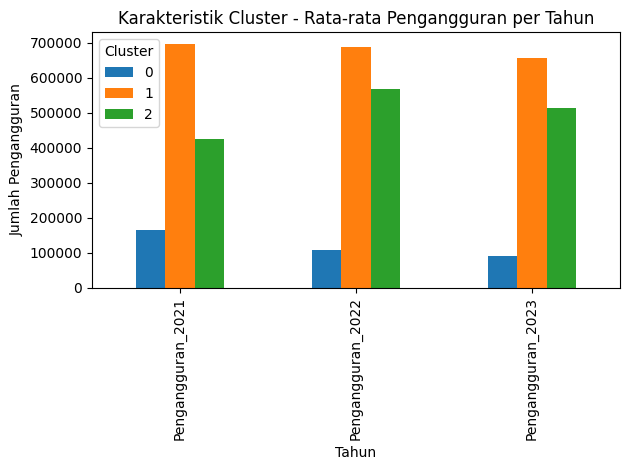

In [5]:
# Menghitung rata-rata setiap cluster
cluster_means = df.groupby('Cluster')[['Pengangguran_2021', 'Pengangguran_2022', 'Pengangguran_2023']].mean()
print("\nKarakteristik setiap cluster (rata-rata):")
print(cluster_means)

# Visualisasi karakteristik cluster
plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind='bar')
plt.title('Karakteristik Cluster - Rata-rata Pengangguran per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengangguran')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()